# Introduction

**This IBM Sample Dataset has information about Telco customers and if they left the company within the last month (churn). Each row represents a unique costumer, while the columns contains information about customer’s services, account and demographic data. We will be using Python and Seaborn library to plot and analyze the data.**

Basic information:

Only 7043 rows
There are 21 columns with 19 features
Only 11 missing values (next item).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set(style="white")
df = pd.read_csv("C:/Users/Bayram/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## 1.1 Impute Missing Values

There are only 11 missing values, all of them for the TotalCharges column. This values are actually a blank space in the csv file and are exclusive for customers with zero tenure. It's possible to concluded that they are missing due to the fact that the customer never paid anything to the company. We will impute this missing values with zero:

In [11]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0.0).astype('float32')

In [12]:
df['TotalCharges'].dtype

dtype('float32')

## 1.2 Target Variable

We are trying to predict if the client left the company in the previous month. Therefore we have a binary classification problem with a slightly unbalanced target:

Churn: No - 72.4%
Churn: Yes - 27.6%

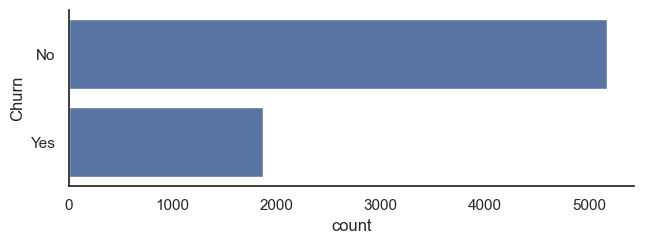

In [15]:
ax = sns.catplot(y='Churn', kind='count', data=df, height=2.6, aspect=2.5, orient='h')

## 2. Numerical features
There are only three numerical columns: tenure, monthly charges and total charges. The probability density distribution can be estimate using the seaborn kdeplot function.

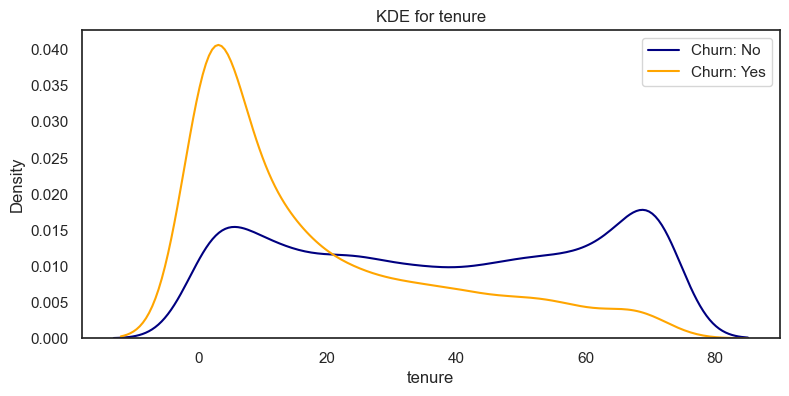

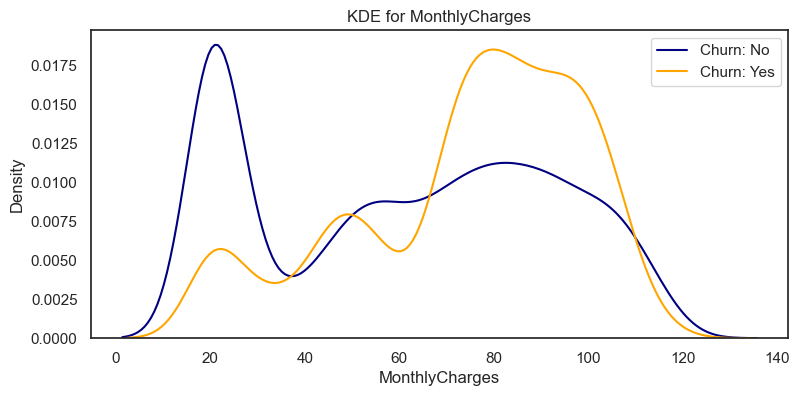

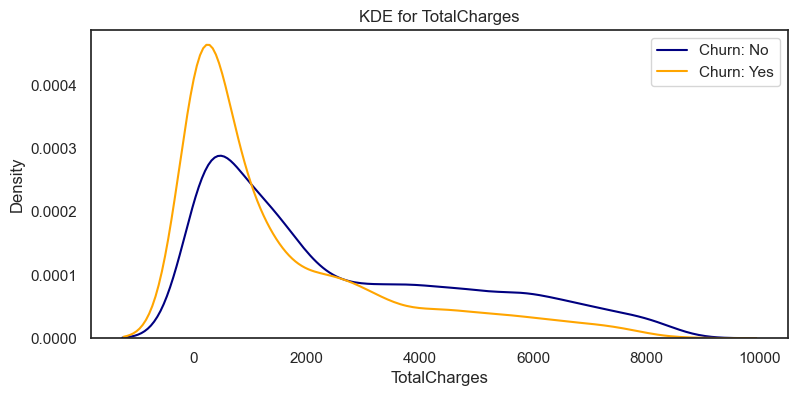

In [18]:
def kdeplot(feature):
    plt.figure(figsize=(9,4))
    plt.title('KDE for {}'.format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color='navy', label='Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color='orange', label='Churn: Yes')
    plt.legend()

kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')


From the plots above we can conclude that:

Recent clients are more likely to churn
Clients with higher MonthlyCharges are also more likely to churn
Tenure and MonthlyCharges are probably important features
In fact we can see some boundaries when we use scatter plots:

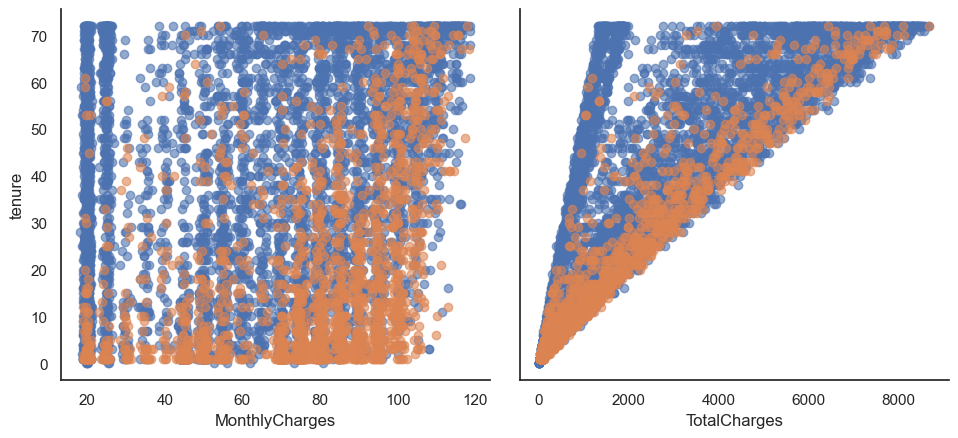

In [20]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

Another feature we can consider is the difference between the MonthlyCharges and the TotalCharges divided by the tenure:

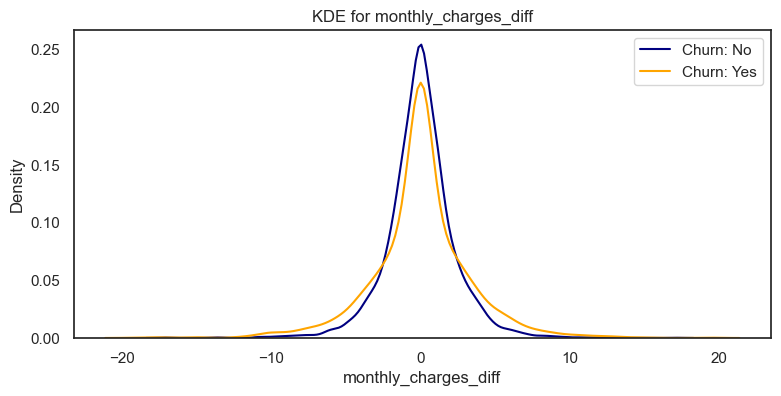

In [22]:
# Calculate features
df['total_charges_to_tenure_ratio'] = df['TotalCharges'] / df['tenure']
df['monthly_charges_diff'] = df['MonthlyCharges'] - df['total_charges_to_tenure_ratio']
kdeplot('monthly_charges_diff')

Not a promising feature at first glance, but it might be usefull when combined with categorical features.



# 3. Categorical features
This dataset has 16 categorical features:

* Six binary features (Yes/No)
* Nine features with three unique values each (categories)
* One feature with four unique values

## 3.1 Gender and Age (SeniorCitizen)

In [31]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

# nuh uh

KeyError: 'percentage of customers'

C:\Users\Bayram\AppData\Local\Temp\ipykernel_19560\2785480156.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
c:\users\bayram\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\users\bayram\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same e

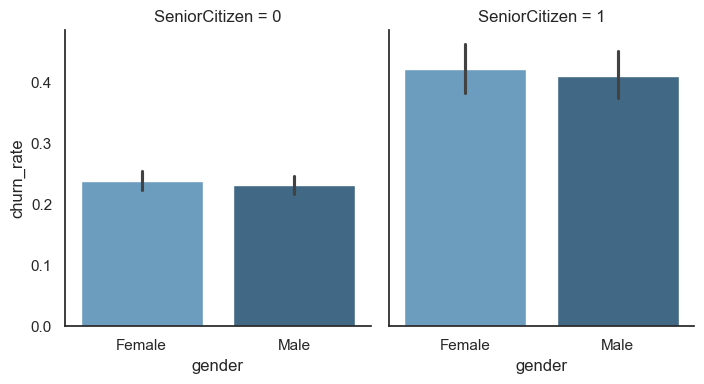

In [32]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

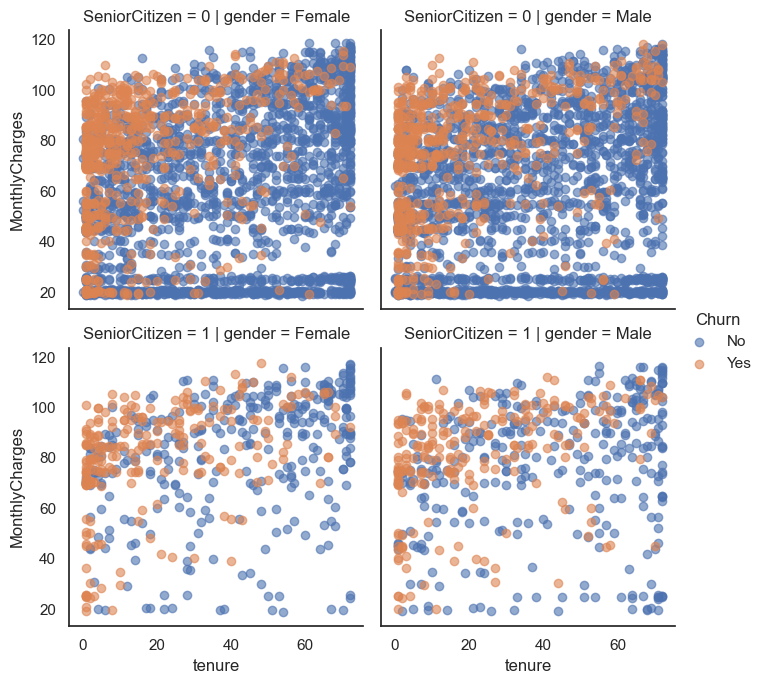

In [33]:
g = sns.FacetGrid(df, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend()

* Gender is not an indicative of churn.
* SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.
* There are no special relations between this categorical values and the main numerical features.

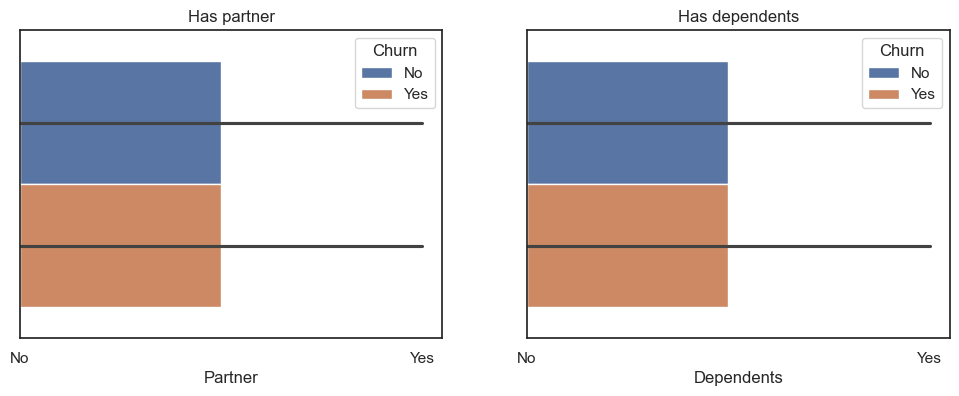

In [41]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": 'percentage of customers'}, axis=1).reset_index()
ax = sns.barplot(x='Partner', hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', hue='Churn', data=gp_dep, ax=axis[1])

# no no

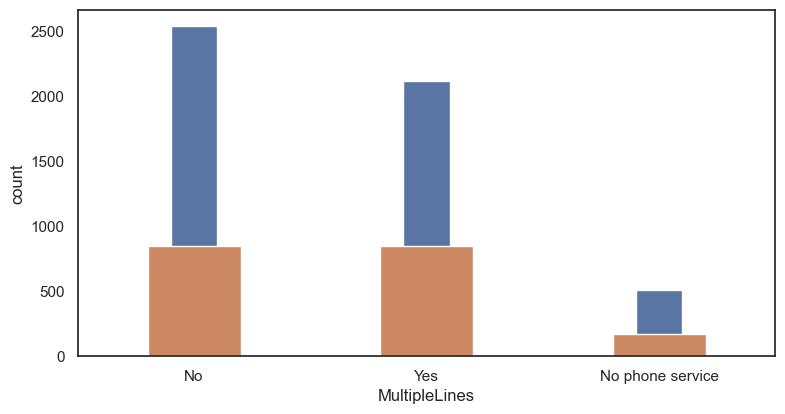

In [60]:
plt.figure(figsize=(9, 4.5))
width=0.2
sns.barplot(data=df[df['Churn'] == 'No']['MultipleLines'].value_counts(), width=width)
sns.barplot(data=df[df['Churn'] == 'Yes']['MultipleLines'].value_counts(), width=width*2)

plt.xticks(ticks=[0,1,2],labels=['No', 'Yes', 'No phone service'])

plt.show()

* Few customers doesn't have phone service
* Customers with multiple lines have a slightly higher churn rate

Let's see how multiple lines affects the monthly charges:

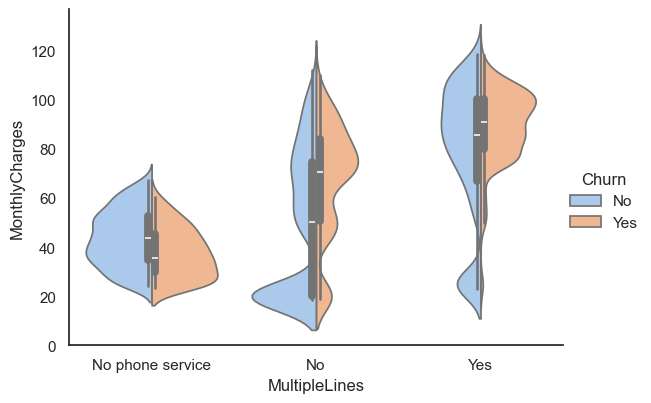

In [63]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=df, height=4.2, aspect=1.4)